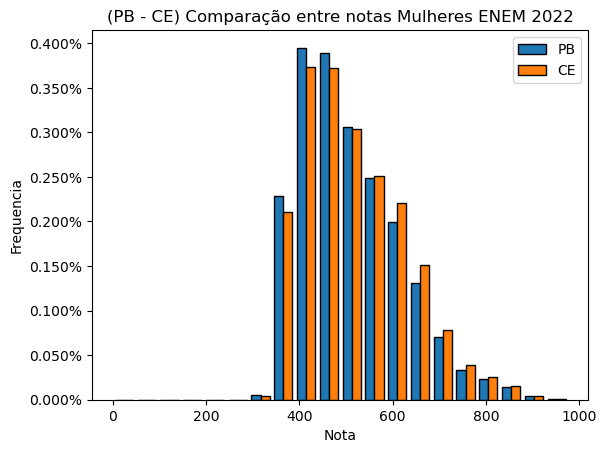

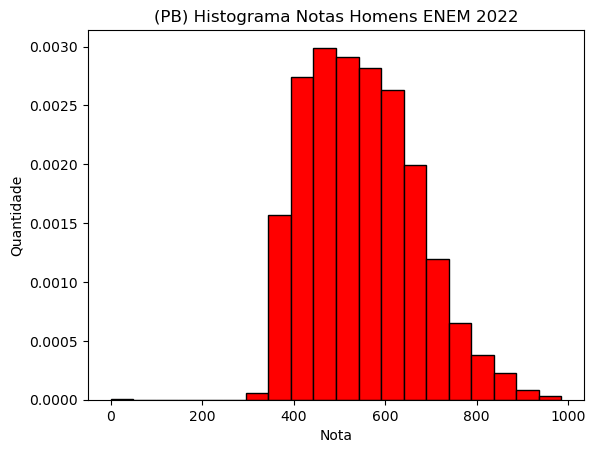

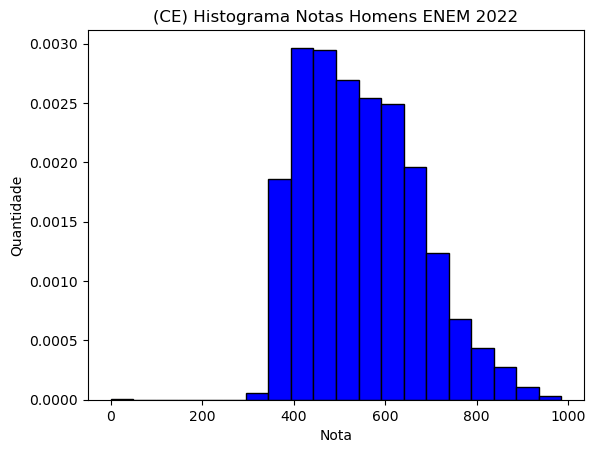

Media Sexo Feminino (PB):  509.62866795812005
Media Sexo Feminino (CE):  516.7347925518201
Media Sexo Masculino (PB):  550.1891205343588
Media Sexo Masculino (CE):  548.1340441468036


In [26]:
import _sqlite3
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import PercentFormatter


conn = _sqlite3.connect('ENEM.sqlite')

queryMulheresCeara = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_SEXO = 'F' AND SG_UF_PROVA = 'CE'"
queryMulheresParaiba = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_SEXO = 'F' AND SG_UF_PROVA = 'PB'"
dataMulheresCE = pd.read_sql_query(queryMulheresCeara, conn)
dataMulheresPB = pd.read_sql_query(queryMulheresParaiba, conn)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.hist([ dataMulheresPB['NU_NOTA_MT'], dataMulheresCE['NU_NOTA_MT'] ], bins=20, density=True, label=['PB', 'CE'], edgecolor='black')
plt.legend(loc='upper right')
plt.ylabel('Frequencia')
plt.xlabel('Notas')
plt.title('(PB - CE) Comparação entre notas Mulheres ENEM 2022')
plt.show()


queryHomensCE = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_SEXO = 'M' AND SG_UF_PROVA = 'CE'"
queryHomensPB = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_SEXO = 'M' AND SG_UF_PROVA = 'PB'"
dataHomensCE = pd.read_sql_query(queryHomensCE, conn)
dataHomensPB = pd.read_sql_query(queryHomensPB, conn)

conn.close()

plt.hist(dataHomensPB['NU_NOTA_MT'],density=True, bins=20, color='red', edgecolor='black')
plt.ylabel('Quantidade')
plt.xlabel('Nota')
plt.title('(PB) Histograma Notas Homens ENEM 2022')
plt.show()

plt.hist(dataHomensCE['NU_NOTA_MT'],density=True, bins=20, color='blue', edgecolor='black')
plt.ylabel('Quantidade')
plt.xlabel('Nota')
plt.title('(CE) Histograma Notas Homens ENEM 2022')
plt.show()

mediaMulheresPB = dataMulheresPB['NU_NOTA_MT'].mean()
mediaMulheresCE = dataMulheresCE['NU_NOTA_MT'].mean()
mediaHomensPB = dataHomensPB['NU_NOTA_MT'].mean()
mediaHomensCE = dataHomensCE['NU_NOTA_MT'].mean()

print("Media Sexo Feminino (PB): ", mediaMulheresPB)
print("Media Sexo Feminino (CE): ", mediaMulheresCE)
print("Media Sexo Masculino (PB): ", mediaHomensPB)
print("Media Sexo Masculino (CE): ", mediaHomensCE)